# Statistical tests, from scratch

In this chapter we will build up the foundations of statistical tests.  Starting from a foundational example and building on our understanding from there.  We will be implementing some statistical tests in order to deepen our understanding.  

Statistical tests come to us from descriptive statistics.  By making use of descriptive statistics in conjunction, we can build up to analytic tools for discerning truth.  In this way, we can see a statistical test as a clever use of descriptive statistics in order to better understand the world around us.

## Foundational Example

Let us begin with the foundational example, that of milk poured into tea and tea poured into milk.

### Set up

Assume that a person claims they can tell the difference between tea poured into milk and milk poured into tea.  Such an ability may seem unlikely.  But how unlikely is it?  One way to verify whether or not an individual poses such an ability is to devise an experiment.  

As an aside, all of science is either experimentally or theoretically evaluated.  Where experimental evaluation is always done via the use of statistics and probability to evaluate the data of an experiment.  And theoretical evaluation comes to us from the manipulation of equations to discern truth.  

Before we go through the logic of the experimental design for this experiment, see if you can come up with your own experimental design.  What would you account for in your experiment?  How would you ensure you can trust your results?  What is your null hypothesis?  What is your alternative hypothesis?  How sure will you be of your results?  And how will you know?

These are many of the foundational questions one needs to consider before starting out an experiment.  I think this blog post does a decent job of introducing more on the topic of experimental design: https://towardsdatascience.com/data-science-you-need-to-know-a-b-testing-f2f12aff619a

Without further ado, the set up:

A researcher randomly decided whether to pour tea into milk or milk into tea for eight cups of tea.  Then he presented the eight cups of tea to the person claiming to be able to tell the difference.  Here the null hypothesis is that the person cannot tell which tea cup is which.  The alternative hypothesis is that they cannot.  If the person gets all eight tea cups correctly, then the researcher believed we could reject the null hypothesis and that it was likely the alternative hypothesis was true.

How likely was it that the alternative hypothesis was true?  Well thats actually easy to calculate.  Because there are eight cups of tea and each was randomly assigned to case one and case two, that meant that there was no conditional information between cups of tea.  This means that the probability of getting all eight cups of tea correct is:

$$ \frac{1}{2^{8}} = \frac{1}{256} \approx 0.003 $$

So there is less than a 1% chance that the person gets all eight cups right, given that they were guessing.  So if they do get all eight right, we should assume there is a pretty good chance that they know how to tell the difference.  But is that enough?  Are we confident in saying that this person knows how to do this?  

Well one way you could check is run the experiment multiple times on multiple days and check the results.  The chance of any individual one of these tests getting the alternative hypothesis goes up, but it's increasingly likely that the typical case will emerge for most of the tests.  How likely a test is to fail to give a correct response is related to its statistical power - the chance of getting a false positive.  This general procedure of running an experiment multiple times is called a replication study and it is crucial to science.  If you cannot replicate an experiment, then the experiment should not be trusted.  But I digress.

There are some general features of our experiment that we should make explicit:

1. Our tea took on one of two states - tea poured into milk or milk poured into tea.  In general we usually break up our experiment into two possible cases - test and control.  In the test set a "treatment" is applied and for the control set either no treatment is given or a placebo is given.  

2. Enough trials were performed during the experiment to make the possability of an accidental false positive fairly unlikely.  In this case, a less than 1% chance.  For some experiments this is nowhere near enough tolerance.  It really all depends on what you are trying to measure and how important getting it right is.  The industry agreed upon standard is 5% margin of error, which might be good enough or maybe not.

3. After the experiment, we should not be 100% confident in our results.  We should be reasonably confident.  We should be as confident as the margin of error, in this case about 99.7% confident.  But we should not, nor should we ever really be 100% confident in a result.  And we should increase our confidence only after some number of replication studies have been performed.  This shows us the importance of creating experiments where replication is relatively easy to perform.  If replicating our experiment is very, very hard, then it might be a bad experiment.  Of course, it all depends.  

## A Digression Into Computing Probabilities

* sample spaces
* event space
* permutations
* combinations

## Sample Spaces

A sample space is the space of all possible outcomes for a given "event".  We define an event as the thing of study.  Speaking in vague terms like this can be difficult, so let's make things clearer with some examples:

### Gambling

While gambling can be a terrible habit, it's great for studying probability.  This is because gambling is about games of chance.  In this "chance" element we can find a rigorous ground to study the precepts of probability.  Let's start with the simplest possible gambling game, a coin flip.

#### Coin flip

In order to study this "game" we need to consider first the space of possible outcomes.  In our case, much like the tea example there are two possible "outcomes", that is two possible states that the coin can end up in after it is flipped.  You may think this isn't terribly complex, but it can still give us much fertile ground to study the world, as well as to develope many techniques which can be applied elsewhere.  In fact, the computers we rely on every day share some similar properties to this "simple" binary outcome space.  But I digress.

Let's start off our analysis by looking at the sample space for a single flip.  That is:

Sample Space for a coin := `{Heads, Tails}`

In mathematics we typically use a short hand so let's further refine our definition to:

Sample Space for a coin := `{H, T}`, where `H` stands for `Heads` and `T` stands for `Tails`.

So if our "game" is defined by people placing bets on heads or tails and then a single flip of the coin discerns who wins, we are done with our initial analysis.  What can we do next?  Well, now that we know the "space" of our possible samples in totality we can easy define the "probability" of each case occuring:

Assuming our coin is "fair" then the following is true:

* P(H) = 1/2
* P(T) = 1/2

This doesn't tell us how well or poorly we will do for a given toss of the coin.  However if we were to play many games placing a bet each time, we would know how well we would do "in the long run".  Let's try to visualize this.  In order to do so, we'll need a random "process" that selects one value half the time and another value the other half of the time.  Fortunately we have a such a "process", it's name is the Bernoulli distribution.  

Note: we are using the term "process" to mean the mathematical object that "randomly" produces data that models the real world.  In general anything that spits out data according to some notion of "randomness" we will define as a "process".

Here the reason we use the Bernoulli distribution as our "process" is because we can sample from this distribution to simulate what will happen with coin flips.  We might say that a Bernoulli distribution "models" coin flips in this case, because it accurately captures the essence of our interest of study.  And without having to actually flip any coins!

Now then, let's sample from our Bernoulli distribution and figure out what happens to our money over the long run placing single bets on single coin flips!

We'll need just a little bit more set up before we are ready to visualize:

1. We'll start with one dollar bets
2. Everytime we win we win a dollar
3. Everytime we lose we lose a dollar
4. The game ends when we run out of money.

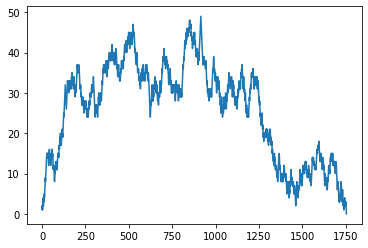

49


In [16]:
from scipy import stats
import matplotlib.pyplot as plt

probability = 0.5

money = 1

winnings_over_time = []
while money > 0:
    outcome = stats.bernoulli.rvs(probability, size=1)[0]
    if outcome == 1:
        money += 1
    else:
        money -= 1
    winnings_over_time.append(money)
    
plt.plot(winnings_over_time)
plt.show()
print(max(winnings_over_time))

Looks like we make some money for a while, going as high as 49 dollars.  But eventually we end up losing everything because when your odds are _always_ 50/50 eventually you'll hit a rough patch.  Another way we can analyze this game is by looking at how the probability converges to 50 % odds.  Let's look at that now:

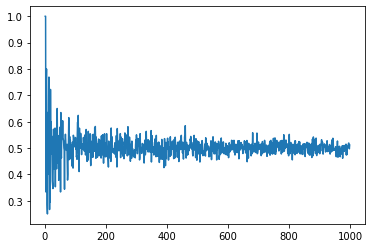

In [19]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

probability = 0.5

average_outcomes = []
for size in range(1000):
    average_outcomes.append(
        np.mean(stats.bernoulli.rvs(probability, size=size))
    )

plt.plot(average_outcomes)
plt.show()

As you can see, as the number of trials, that is the number of times we flip the coin goes up the expected probability, that is the number of times we get heads on average goes to 50%.  Notice how that band around 0.5 gets closer and closer.  This is because as we do more and more trials things become more and more normalized.  Another way to think of this is as the point of convergence.  We may never get to exactly 0.5, but we get ever closer to 0.5 as we take more trials into consideration.  That's why as we play increasingly more single bet games of flipping the coin, we get "increasingly close" to our theoretical expectation.

Just to continue on our digression let's look at another variant of this game.  What if now instead of placing bets each game, our total winnings was doubled for each successive head we saw in a row.  

So if we see 2 heads in a row we win two dollars, if we win three heads in a row we win 4 dollars, in general if we see "N" heads a row we see $2^{N}$ dollars.  Given this set up, do we think the game will still end with us losing it all?  Will we have much longer runs before that happens, assuming it's inevitable?

Let's do some experiments to find out:

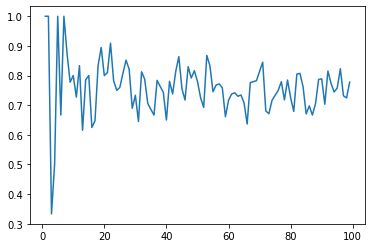

1.0


In [32]:
from scipy import stats
import matplotlib.pyplot as plt

def trial():
    probability = 0.5
    money = 1
    winnings_over_time = []
    consecutive_wins = 0
    num_iter = 0
    while money > 0:
        num_iter += 1
        outcome = stats.bernoulli.rvs(probability, size=1)[0]
        if outcome == 1:
            money += 2**consecutive_wins
            consecutive_wins += 1
        else:
            money -= 1
            consecutive_wins = 0
        winnings_over_time.append(money)
        if num_iter > 10000:
            break
    return winnings_over_time[-1] == 0

probability_win_something = []
for number_of_trials in range(1, 100):
    lose_all_money = 0
    win_something = 0
    for _ in range(number_of_trials):
        if trial():
            win_something += 1
        else:
            lose_all_money += 1
    probability_win_something.append(
        win_something/(win_something+lose_all_money)
    )
plt.plot(list(range(1, 100)), probability_win_something)
plt.show()
print(max(probability_win_something))

Even though the chance of getting N heads in a row is vanishingly small, it makes a huge difference for the "profitability" of the game.  Because the event only needs to happen sometimes and because the lose is assymetrically small, the game persists far more often with a much higher win rate.  Just to make sure the point is clear.  Let's look at the probability of `N` heads in a row as `N` gets large:

[2.524354896707238e-29,
 1.262177448353619e-29,
 6.310887241768095e-30,
 3.1554436208840472e-30,
 1.5777218104420236e-30]

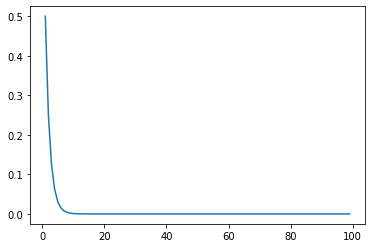

In [2]:
import matplotlib.pyplot as plt

def probability_of_nth_head(n):
    return 1/(2**n)

num_heads = list(range(1, 100))
probability = [probability_of_nth_head(n) for n in num_heads]
plt.plot(num_heads, probability)
probability[-5:]

As you can see, the "vanishingly" small probability is truly small, however it never quiet reaches zero.  Thus far we've assumed that our coin was fairly weighted, that is, that a tail was just as likely as a head with each coin flip.  However not all coins are fair.  We could set up an experiment where we hypothesize that the coin is fair and then test whether indeed it is.

In order to validate this hypothesis we'll need something to compare against.  So we'll see the distribution we've already made mention of, the bernoulli distribution.  If the coin is indeed fair then when comparing it to a bernoulli distribution, we should get a similar number of heads and tails.  We should also set up error bounds.  If a given experiment falls within the upper and lower bounds of some tolerance, then we just still reject the null hypothesis of fairness.  But if we fall outside that margin, we should reject the null hypothesis.

Let's sketch out how this _could_ work:

First we'll state our null hypothesis:

The coin follows a bernoulli distribution with probability = 0.5

Alternative hypothesis:

The coin does not follow a bernoulli distribution with probability = 0.5

Next let's set up are margin of error:

If the number of heads occurs more than 5% of the time in the reference distribution then we fail to reject the null hypothesis.

Now let's write some code to look at how this might work:

In [3]:
from scipy import stats

def simulate_coin_flips(number_of_flips, number_of_simulations, probability=0.5):
    simulations = []
    for _ in range(number_of_simulations):
        simulations.append(
            sum(stats.bernoulli.rvs(
                probability, size=number_of_flips
            ))
        )
    return simulations
    
experiment = [0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
simulations = simulate_coin_flips(10, 1000)
experiment_heads = sum(experiment)
len([simulation for simulation in simulations if simulation == experiment_heads])/len(simulations)

0.244

So with the above calculation, we count the number of times heads came up.  Then we look at how many times out of a thousand the same number of heads was found.  The reason we can do a simple summation in this case, is because each flip of the coin is "memoryless", that is each event is not influenced by the past.  Therefore you are equally likely to get heads in the future as you were in the past.  Because of this, we simply need to count the number of heads.  It doesn't matter whether they occur all in a row or dispersed throughout the flips.  

As you can see, we get the same number of heads as our experiment about 25% of the time.  This is enough evidence for me to say that the "experimental" coin is probably a fair one.  Or at least close enough to fair.  How else might we verify that the coin is fair?  Can you think of any other ways to verify this?

The point of the above exercise is _not_ to provide a definitive way of getting the answer, but instead to inspire you to try things.  There are _surely_ other ways to verify that the coin is fair.  Instead, I'm hoping you'll notice the general outline of what we were talking about:

1. set up a null and alternative hypothesis - these are your expectations going into the experiment.
2. set up your acceptance criterion for rejection of the null hypothesis.
3. compare your experimental result against a known reference distribution.
4. come to a conclusion _based_ on your experiment.

It is far more important that you internalize this set of steps than it is that you internalize the above code.  If you think in this way, then things become much clearer about how you ought to proceed.  And then designing a new test should be relatively straight forward.

Before we leave this section let's discuss _why_ we've chosen to look at a coin flip.  The coin is actually just a _reference model_.  It's something simple and familiar so that we can understand a much larger and more interesting idea.  And it gives us a way of introducing the bernoulli distribution.  In reality there are lots of random "processes" which are governed by a binary choice between two possible states.  Here are just a few examples:

1. The states of a bit in a computer - on and off, or 1 and 0
2. The states of a turn style - locked and unlocked
3. The states of a machine - working and broken

All of these can be simulated by a random process, are memoryless and can flow from one state to another.  So probabilistically they are not dissimilar from coin flips.  

#### Dice

Let's look at another reference model for a random process.  This too will follow a new distribution, allowing us to answer a broader range of questions, with potentially interesting implications.  This distribution will be the uniform discrete distribution.

Let's consider a simple example:

In [14]:
from scipy import stats

[stats.randint(0, 10).rvs() for _ in range(10)]

[4, 9, 8, 4, 9, 1, 9, 2, 6, 8]

As you can see, the values are drawn from the range randomly, with the probability of each value being drawn as:

$$
\frac{1}{b-a}
$$

Where:

* b := the end of the range
* a := the beginning of the range

In our case this means each number has a $\frac{1}{10}$ chance of being chosen.  Let's verify this with some quick code:

In [19]:
dicter = {}.fromkeys(list(range(0,10)), 0)
for value in stats.randint(0, 10).rvs(size=5000):
    dicter[value] += 1

for key in dicter:
    dicter[key] /= 5000

dicter

{0: 0.097,
 1: 0.1014,
 2: 0.0936,
 3: 0.0998,
 4: 0.0954,
 5: 0.1024,
 6: 0.1064,
 7: 0.097,
 8: 0.0966,
 9: 0.1104}

As you can see there is about a $\frac{1}{10}$ chance of being chosen.

Now let's put our new distribution to good use!  Consider a game of dice.  Here we will have two dice, both of which will be six sided.  Your score will be determined based on what number you roll, which is the summation of the two dice.  If you have a higher score, you win!

Let's say player one rolls 3, 4.  And player two rolls 4, 3.  In this case, no one wins.  This presents us with a question - how often do players tie?  We'll answer this with code and a simulation:

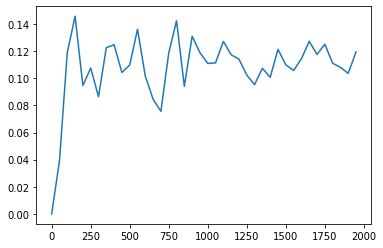

In [27]:
from scipy import stats
import matplotlib.pyplot as plt

def simulate_dice(number_of_games):
    simulations = []
    for _ in range(number_of_games):
        player_one = stats.randint(1, 7).rvs(size=2).sum()
        player_two = stats.randint(1, 7).rvs(size=2).sum()
        simulations.append(int(player_one == player_two))
    return sum(simulations)/len(simulations)
    
probability_of_tie = [simulate_dice(num_games) for num_games in range(1, 2000, 50)]
number_of_games = list(range(1, 2000, 50))
plt.plot(number_of_games, probability_of_tie)

As you can see the probability settles around $\frac{11}{100}$.  Using this information, we could run a series of experiments to figure out if two players are playing with "fair" dice.  If after perhaps a thousand trials the number of ties should approach this $\frac{11}{100}$ proportion.

Next let's use partial information to deduce a third piece of information.  Suppose we know that:

1. player one wins 35% of the time
2. player one ties 13% of the time

Can we conclude how often player two wins?  Yes!  Take a moment to see if you can deduce this for yourself.

It turns out this answer is actually quiet trival to calculate:

In [20]:
player_one_wins = 0.35
player_one_ties = 0.13
1 - (player_one_wins + player_one_ties)

0.52

Here the "1" represents the entire sample space.  We can decompose this space into one of three outcomes:

1. player one wins
2. player two wins
3. players one and two tie

Since there is no third option, the probability of these three events _must_ sum to 1.

This means, if we are given enough partial information about the "space of events", we can deduce the rest of the probabilities of the space of events.  Next let's introduce some new probability notions.

For this we'll need to formally introduce a new term:

## Event Space

The event space full describes a space of interest.  The sum of all events in the event space is 1.  Also the probability of all events are associated with a number between 0 and 1.

We've actually been looking at event spaces already.  But having the formal definition will be helpful for what we are about to discuss.

Consider two events:

1. Rolling a 6 with one die.
2. Rolling an odd number with the other die.

The events can be written with the language of probability as:

$$
E_{1} = P(6)
$$

$$
E_{2} = P(1 \cup 3 \cup 5)
$$

Let's look at how to simulate this in code:

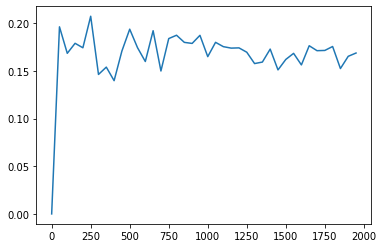

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

def simulate_dice(number_of_games):
    simulations = []
    for _ in range(number_of_games):
        dice = stats.randint(1, 7).rvs(size=2)
        if (dice[0] == 6) and (dice[1] % 2 == 1):
            simulations.append(1)
        elif (dice[1] == 6) and (dice[0] % 2 == 1):
            simulations.append(1)
        else:
            simulations.append(0)
    return sum(simulations)/len(simulations)

probability_of_both_events = [simulate_dice(num_games) for num_games in range(1, 2000, 50)]
number_of_games = list(range(1, 2000, 50))
plt.plot(number_of_games, probability_of_both_events)

As you can see around 16% of the time both cases will be true.  But this is the only way we could figure this out?

We could also simply look at the space of probability!

In [38]:
probability_of_rolling_a_6 = 1/6
probability_of_rolling_an_odd = 1/2
2 * (probability_of_rolling_a_6 * probability_of_rolling_an_odd), 0.16

(0.16666666666666666, 0.16)

How did we come up with our calculation?  First we consider the probability of getting a "6", which is:

$$
\frac{1}{6}
$$

Then we consider the probability of rolling an odd, which is:

$$
\frac{1}{2}
$$

Since we didn't specify an order, then we multiply by two, because _either_ we can get (6, odd number) _or_ (odd number, 6).  We could also solve this by looking at all the pairs that satisfy our criteria _against_ all those that don't:

In [45]:
from itertools import product

space_of_events = list(product(
    list(range(1, 7)), 
    list(range(1, 7))
))

count = 0
for event in space_of_events:
    if (event[0] == 6) and (event[1] % 2 == 1):
        count += 1
    elif (event[1] == 6) and (event[0] % 2 == 1):
        count += 1
count/len(space_of_events)

0.16666666666666666

We get the same answer!!!  And we didn't even need to run thousands of simulations!!!  This means we can "quickly" get to answers when our event space is well defined.  Before we leave this example, let's touch on one last point.  How did we know we could freely multiply our two probabilities together?  We could do this because our two events were independent - what we rolled with one die doesn't effect how the other die will turn out.  

If our first event _does_ effect our second, we need to consider the _conditional_ probability of our first event on our second when doing the calculation.

## Conditional Probability



For each of the above talk about how to use this in an experimental context.  The key is a limited sample space of possible outcomes.

## What to do when our sample space is not well defined?

# Writing Our Own Statistical Tests

Now that we know how to set up an experiment, let's come up with a set of statistical tools to help us test hypotheses in general, without having to calculate the specifics of the test every time.

## Implementing T-Tests

There are a number of t-tests.  For each t-test we will be using a worked example to illustrate how to use our implementation.  Technically any test is a t-test if the test statistic follows a t-distribution.  

### Example One - Designing a good enough pilot cockpit

Let's say that you are a military contractor and you need to come up with a cockpit for pilots.  If the cockpit is too big, then the plane will not be economical and cost way too much.  If the cockpit is too small then the plane is useless and won't work for enough pilots.  So figuring out what a good size cockpit is, is imperative.

Additionally, prior to the current leadership, this problem was solved by selecting pilots that were of a certain maximum height and build.  However, a study from a government think tank showed that pilot effectiveness is partially tied to height because athletes tend to be taller, and have better hand eye coordination.  Therefore the old constraints are being thrown out and all future candidate batches are being tested for core competency on a simulator and then the top 10% of pilots are chosen.

You have been supplied with the heights of the candidates that passed as well as the population of heights for current pilots.  Do we need to design a plane design because we need a new cockpit?

### One Sample T-Test

The one sample t-test is perfect for this problem, assuming both populations are normally distributed.  The way all hypothesis tests are done is first you calculate a test statisitic and then compare it against a set of critical values for some reference distribution.  In our case, we will be looking at a t-value as our test statistic and comparing this against critical values from the t-distribution.

The formula for calculating the t-value is:

$$ \frac{\bar{x} - \mu}{s.e.} $$

Where:

* s.e. is standard error:= $\frac{\bar{\sigma}}{\sqrt{n}} $
* $ \bar{x} $:= sample mean
* $ \mu $ := population mean

Next we pass the calculated t-value from the above equation into the cumulative density function for the t-distribution along with the degrees of freedom, defined as $ n-1 $.  This gives us the p-value.  Note that the p-value is the same value we calculated above in the example - it is the probability of seeing a test statistic as extreme as the one we found.  So if our p-value is very low, we can confidently reject the null hypothesis, in this case, that the sample and population mean's are close.

You may be wondering, why do we make use of the cumulative density function?  Upon inspection of its definition, the answer should become obvious:

The cumulative density function "accumulates" the density of the probability up until that point.  Mathematically:

$$ \sum_{i=0}^{i=k} p_{i} $$

for some value k.  If k = $ \infty $ then

$$ \sum_{i=0}^{i=k} p_{i} = 1 $$

From this we see that our CDF is the density of the probability up until the t-value.  Therefore, by plugging the t-value for k, we get the total probability up until that point.  By taking 1 - CDF up to k=t-value, we are able to recover how much probability is "left over" such that our null hypothesis is true.

In [99]:
import numpy as np
from scipy import stats

def calculate_t_value(sample, population_mean):
    standard_error = np.std(sample)/np.sqrt(len(sample))
    sample_mean = np.mean(sample)
    return (sample_mean - population_mean)/standard_error

def compare_with_critical_values(t_value, df):
    return (1 - stats.t.cdf(t_value, df))


We'll suppose we are handed the following information:

* passing cadets with an average height of 68 inches (a little less than 6 ft) and a standard deviation of 10 inches
* the current average height of pilots is 60 inches (5 ft even)

In [100]:
passing_cadets = np.random.normal(68, 10, size=1000)
average_height_of_pilots_now = 60
t_value = calculate_t_value(passing_cadets, average_height_of_pilots_now)
compare_with_critical_values(t_value, len(passing_cadets)-1)

0.0

According to this, we we will need to design a new cockpit for pilots moving forward.  Just to see, let's figure out what a close enough height for the cadets would have been:

In [174]:
passing_cadets = np.random.normal(60.4, 10, size=1000)
average_height_of_pilots_now = 60
t_value = calculate_t_value(passing_cadets, average_height_of_pilots_now)
compare_with_critical_values(t_value, len(passing_cadets)-1)

0.3818950090372383

In the interest of completeness, this hypothesis test doesn't always pass.  This is because the sample matters.  But it passes at least sometimes.  That is, the pvalue is above the 0.05 threshold sometimes.

### Example Two - Replicating The Original Study 

Since we've already looked at this example a bit, we'll continue forward with it to answer another question.  Now that you've found that you'll likely need to redesign all the cockpits for the various planes, it's time to do some more digging.  We should make absolutely certain that the original study, which presented this notion about athletic ability and it's tie to being an effective fighter pilot.  Is it really true that those who scored the highest are taller?  Or are skills randomly distributed?  This question is important, because it will have an effect on your recommendation for how big or how varied the cockpit sizes will be.

For this we will be looking at three seperate bases that are now administering tests to a range of candidates.  We will look at the heights for the top ten percent of each cadet class.  Specifically, we will ask the null hypothesis, of

$$ \mu_{a} = \mu_{b} = \mu_{c} $$

where $\mu_{i}$ = mean of base $i$

### F-Test

For this we are going to need an F-test which looks at the ratio of explained variance to unexplained variance and compares this with the cumulative density function of an f-distribution.

The formula for explained variance is:

$$ \sum_{i=1}^{K} \frac{n_{i} (\bar{Y}_{i} - \bar{Y})^{2}}{K-1} $$

where $ \bar{Y_{i}}$ is the sample mean and $ \bar{Y} $ is the population mean.

We can also think of explained variance as the between group variance.

The formula for unexplained variance is:

$$ \sum_{i=1}^{K} \sum_{j=1}^{n_{i}} \frac{(Y_{ij} - \bar{Y_{i}})^{2}}{N-K} $$

Here $ Y_{ij} $ represents each individual element.  We can think of unexplained variance as the within group variance.

In [162]:
from scipy import stats

def calculate_statistics(samples):
    combined_samples = []
    for sample in samples:
        combined_samples += sample
    population_mean = np.mean(combined_samples)
    sample_means = [np.mean(sample) for sample in samples]
    sample_lengths = [len(sample) for sample in samples]
    total_sample_size = len(combined_samples)
    return population_mean, sample_means, sample_lengths, total_sample_size 

def calculate_explained_variance(population_mean, 
                                 sample_means,
                                 sample_lengths, 
                                 num_samples):
    explained_variance = 0
    for index in range(num_samples):
        sample_mean_deviation = sample_means[index] - population_mean
        sample_mean_deviation = sample_mean_deviation**2
        sample_mean_deviation *= sample_lengths[index]
        explained_variance += sample_mean_deviation
    explained_variance /= num_samples - 1
    return explained_variance
    
def calculate_unexplained_variance(samples, 
                         sample_means, 
                         num_samples, 
                         total_sample_size):
    total_deviance = 0
    for sample_index in range(num_samples):
        element_deviance = 0
        for elem in samples[sample_index]:
            element_deviance += (elem - sample_means[sample_index])**2
        total_deviance += element_deviance
    total_deviance /= (total_sample_size - num_samples)
    return total_deviance
    
def f_test(samples):
    population_mean, sample_means, sample_lengths, total_sample_size = calculate_statistics(samples)
    num_samples = len(samples)
    explained_variance = calculate_explained_variance(
        population_mean, sample_means,
        sample_lengths, num_samples
    )
    unexplained_variance = calculate_unexplained_variance(
        samples, sample_means, 
        num_samples, total_sample_size
    )
    f_statistic = explained_variance/unexplained_variance
    p_value = 1 - stats.f.cdf(
        num_samples-1, 
        total_sample_size-num_samples,
        f_statistic
    )
    return f_statistic, p_value


Here you see we have three seperate bases, which have normally distributed heights.  It is worth noting that the sample sizes are all the same, otherwise you should be less inclined to trust descriptive statistics associated.

In [163]:
base_a = list(np.random.normal(63, 10, size=1000))
base_b = list(np.random.normal(72, 10, size=1000))
base_c = list(np.random.normal(68, 10, size=1000))

f_test([base_a, base_b, base_c])

(21.87861645414123, 0.025842347125262122)

As you can see, we reject the null hypothesis, therefore it is unlikely that taller pilots are better.  It is clearly the case that talent is randomly distributed, without an effect from height.  And therefore, we should recommend that multiple cockpit sizes be designed for folks of different sizes, if we want to maximize fighting potential.